## Module_3: *(Template)*

## Team Members:
Haley Cossman and Spencer Boon

## Project Title:
Classifying Lung Cancer Subtypes Using Apoptosis-Related Gene Expression




## Project Goal:
This project seeks to determine whether differences in the expression of apoptosis-related genes can predict whether a sample is Lung Adenocarcinoma (LUAD) or Lung Squamous Cell Carcinoma (LUSC). We are using a logistic regression model to identify which genes best distinguish the two lung cancer types and to assess whether apoptosis-related genes can serve as predictive markers for cancer subtype classification. The genes we plan to analyze include TP53, BAX, BCL2, BCL2L1, MCL1, and CASP8.

## Disease Background:

* Cancer hallmark focus: Evading Apoptosis
* Overview of hallmark: Normal cells self-destruct when severely damaged; cancer cells frequently short-circuit those death pathways. They disable p53-mediated damage sensing, overexpress anti-apoptotic BCL-2 family proteins (e.g., BCL2, MCL1, BCL2L1/BCL-XL), dampen extrinsic “death receptor” signaling (e.g., FAS/CD95), or hyperactivate survival cascades (PI3K-AKT). The net effect is survival under genotoxic stress and therapy

* Genes associated with hallmark to be studied (describe the role of each gene, signaling pathway, or gene set you are going to investigate): 

TP53: DNA damage sensor; loss attenuates apoptosis (intrinsic pathway).

BAX / BAK1: pro-apoptotic effectors at mitochondria; p53 targets.

BCL2, BCL2L1 (BCL-XL), MCL1: anti-apoptotic mitochondrial guardians; MCL1 amplification is frequent in lung adenocarcinoma and a resistance node.

FAS (CD95), FADD, CASP8, CASP3, APAF1: extrinsic/intrinsic caspase activation machinery; DcR3 (TNFRSF6B) acts as a decoy for FasL and is amplified in some lung tumors.

PIK3CA, AKT1, PTEN: survival signaling (PI3K–AKT) that counteracts apoptosis.

* Prevalence & incidence: Lung & bronchus cancer remains a leading cause of cancer death. SEER reports an incidence rate ~47.8 / 100,000 and death rate 31.5 / 100,000 (age-adjusted; cases 2018–2022, deaths 2019–2023). ACS 2025 projects ~2.04M total new cancer cases and 618k deaths across all sites; lung remains the top cause of cancer mortality. 
https://seer.cancer.gov/statfacts/html/lungb.html

* Risk factors (genetic, lifestyle) & Societal determinants: Tobacco exposure (active & secondhand), radon, occupational carcinogens, air pollution; disparities by geography, socioeconomic status, and race/ethnicity influence exposure, screening access, and outcomes. (Recent national reports also highlight air-pollution-linked adenocarcinoma among never-smokers.)
https://seer.cancer.gov/report_to_nation/stats.html

* Standard of care treatments (& reimbursement): 

Early-stage NSCLC: surgery ± adjuvant chemo; expanding roles for peri-operative immunotherapy/targeted therapy depending on biomarkers.

Metastatic NSCLC: biomarker-directed first-line therapy:

If driver (+): EGFR, ALK, ROS1, RET, KRAS G12C, BRAF V600E, MET exon 14, NTRK → corresponding TKIs. If no driver: PD-L1–stratified immunotherapy ± platinum doublet (e.g., pembrolizumab, atezolizumab; or nivolumab + ipilimumab + limited chemo per ASCO living guideline 2025).Radiation and supportive care as indicated.
https://www.nccn.org/patients/guidelines/content/PDF/lung-metastatic-patient.pdf

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): Lung epithelium (bronchiolar/alveolar) accumulates carcinogen-induced DNA damage; TP53 loss, MCL1/BCL-XL upregulation, and PI3K–AKT activation blunt mitochondrial apoptosis. Tumors can also express death-ligand decoys (DcR3) or down-modulate FAS, reducing immune-mediated killing, collectively enabling survival despite therapy. 
https://pubmed.ncbi.nlm.nih.gov/32913197/



## Data-Set: 

Our data set came from GSE62944, an RNA-sequence dataset from the Cancer Genome Atlas, re-processed by Rahman et al., which includes 24 cancer types, 15000 protein coding genes, and 9264 total tumor samples. We are specifically looking at the Lung Adenocarcinoma (LUAD) and Lung Squamous Cell Carcinoma (LUSC) columns and evaluating the apoptosis-pathway genes listed above. The dataset includes gene expression data in log₂ TPM units and was collected from patient tissue samples. The metadata file provides clinical and diagnostic information for each sample, including cancer type, sample type (tumor vs. normal), patient ID, and other features such as age, gender, and survival status.




## Data Analyis: 

### Methods
The machine learning technique we are using is logistic regression, a type of classification method. This technique is used to predict whether a sample belongs to Lung Adenocarcinoma (LUAD) or Lung Squamous Cell Carcinoma (LUSC) based on the expression levels of apoptosis-related genes. This model uses a sigmoidal/logistic function to convert a weighted sum of gene expression values into a value between 0 and 1, which corresponds to either LUSC or LUAD. More specifically, positive coefficients indicate genes more expressed in LUSC, while negative coefficients indicate genes more expressed in LUAD. Logistic regression is optimized by minimizing the cost function, which measures the difference between predicted probabilities and actual class labels, and uses this optimization to adjust the gene coefficients to predict the cancer type. The model decides that it is good enough when the cost function converges so that further training is not needed for the model to be accurate. Model performance was validated using a train/test split, and metrics such as accuracy and ROC-AUC were used to confirm that the model can moderately distinguish between LUAD and LUSC.


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

Feature matrix shape: (160, 6)
cancer_type
0    80
1    80
Name: count, dtype: int64

Test Accuracy: 0.650
ROC-AUC: 0.650


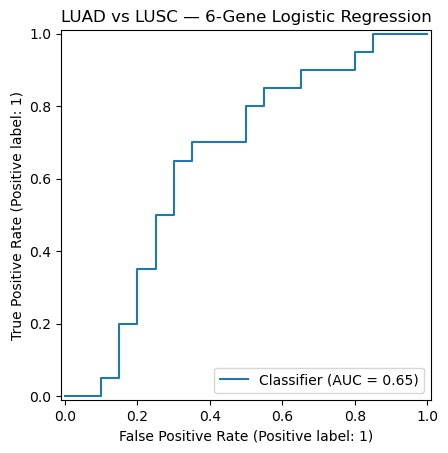


Logistic Regression Coefficients:
     gene      coef
1    BCL2  0.701856
5     BAX  0.567850
4  BCL2L1  0.261012
0    TP53  0.020012
2    MCL1 -0.344419
3   CASP8 -1.973260


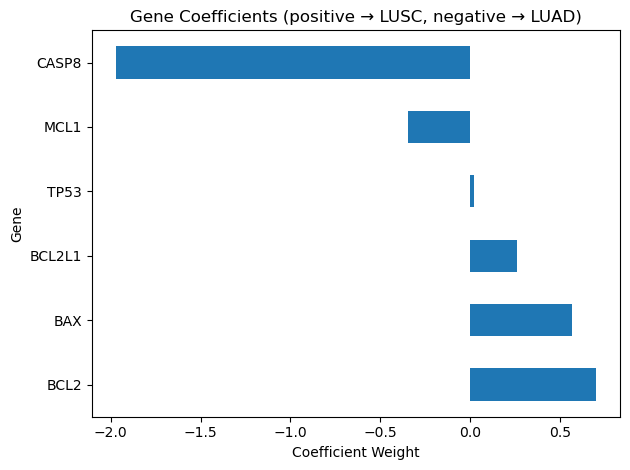

PCA explained variance: PC1=27.61%, PC2=23.08%


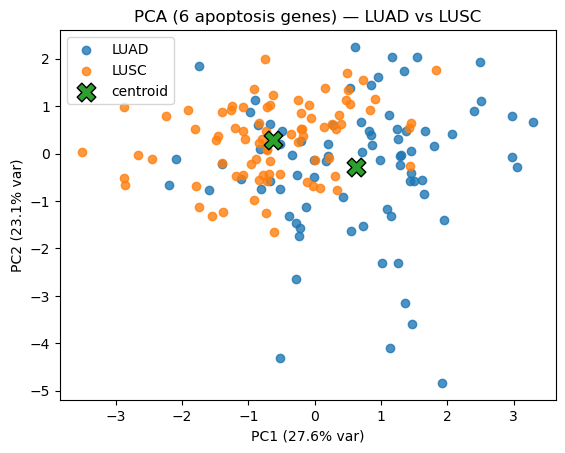

Train Accuracy: 0.792
Train ROC-AUC:  0.899


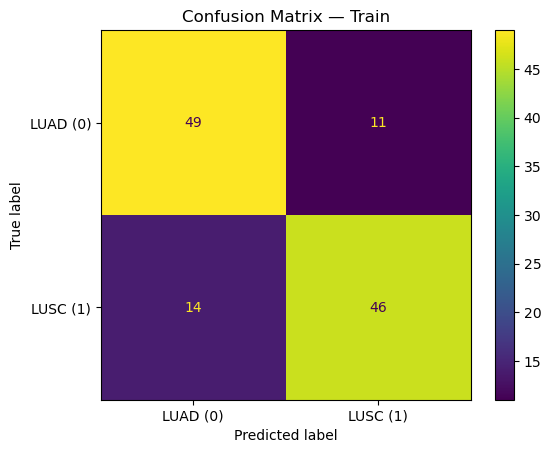

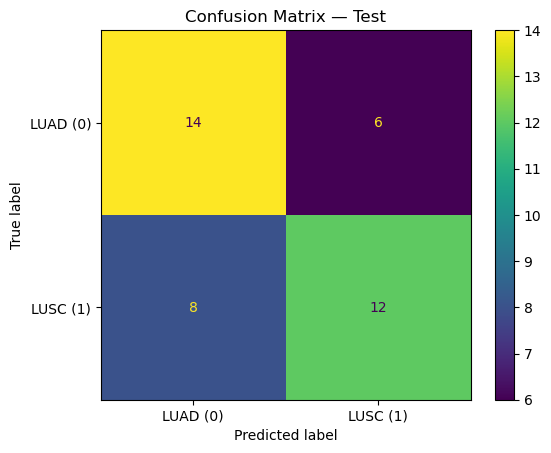


Classification report (Test):

              precision    recall  f1-score   support

    LUAD (0)       0.64      0.70      0.67        20
    LUSC (1)       0.67      0.60      0.63        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

import matplotlib.pyplot as plt

# ---- File paths ----
EXP_PATH = Path(r"C:\Users\haley\OneDrive\Documents\My Notebooks\Module 3\GSE62944_subsample_log2.csv")   
META_PATH = Path(r"C:\Users\haley\OneDrive\Documents\My Notebooks\Module 3\GSE62944_metadata.csv")               

# ---- Load metadata ----
meta = pd.read_csv(META_PATH, index_col=0)
meta_lu = meta[meta["cancer_type"].isin(["LUAD","LUSC"])].copy()
expr = pd.read_csv(EXP_PATH, index_col=0) 
common = expr.columns.intersection(meta_lu.index)

# ---- 6 apoptosis genes ----
genes = ["TP53","BCL2","MCL1","CASP8","BCL2L1","BAX"]
available_genes = [g for g in genes if g in expr.index]
if len(available_genes) < len(genes):
    print("⚠️ Missing genes:", set(genes) - set(available_genes))

# ---- Build features and labels ----
X = expr.loc[available_genes, common].T
y = meta_lu.loc[common, "cancer_type"].map({"LUAD":0, "LUSC":1}).astype(int)

print("Feature matrix shape:", X.shape)
print(y.value_counts())

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---- Logistic regression pipeline ----
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty="l2", solver="liblinear", random_state=42, max_iter=1000))
])

pipe.fit(X_train, y_train)

# ---- Evaluate ----
y_prob = pipe.predict_proba(X_test)[:, 1]
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"\nTest Accuracy: {acc:.3f}")
print(f"ROC-AUC: {auc:.3f}")

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("LUAD vs LUSC — 6-Gene Logistic Regression")
plt.show()

# ---- Coefficients ----
coef = pipe.named_steps["logreg"].coef_[0]
coef_df = pd.DataFrame({"gene": X.columns, "coef": coef}).sort_values("coef", ascending=False)

print("\nLogistic Regression Coefficients:")
print(coef_df)

coef_df.plot.barh(x="gene", y="coef", legend=False)
plt.title("Gene Coefficients (positive → LUSC, negative → LUAD)")
plt.xlabel("Coefficient Weight")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Standardize features for PCA
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)  # using all samples for visualization

# PCA to 2 components
pca = PCA(n_components=2, random_state=42)
XY = pca.fit_transform(X_scaled)

# Pack into a DataFrame for easy plotting
pc = pd.DataFrame(XY, index=X.index, columns=["PC1","PC2"])
pc["label"] = y.map({0:"LUAD", 1:"LUSC"})

# Explained variance
evr = pca.explained_variance_ratio_
print(f"PCA explained variance: PC1={evr[0]:.2%}, PC2={evr[1]:.2%}")

# Scatter plot
fig, ax = plt.subplots()
for lbl, sub in pc.groupby("label"):
    ax.scatter(sub["PC1"], sub["PC2"], alpha=0.8, label=lbl)

# Optional: plot class centroids
centroids = pc.groupby("label")[["PC1","PC2"]].mean()
ax.scatter(centroids["PC1"], centroids["PC2"], s=180, marker="X", edgecolor="k", label="centroid")

ax.legend()
ax.set_title("PCA (6 apoptosis genes) — LUAD vs LUSC")
ax.set_xlabel(f"PC1 ({evr[0]:.1%} var)")
ax.set_ylabel(f"PC2 ({evr[1]:.1%} var)")
plt.show()


from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Train-side metrics for over/underfit check
y_prob_tr = pipe.predict_proba(X_train)[:, 1]
y_pred_tr = pipe.predict(X_train)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_tr):.3f}")
print(f"Train ROC-AUC:  {roc_auc_score(y_train, y_prob_tr):.3f}")

# Confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_tr, display_labels=["LUAD (0)","LUSC (1)"])
plt.title("Confusion Matrix — Train")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["LUAD (0)","LUSC (1)"])
plt.title("Confusion Matrix — Test")
plt.show()

# (Optional) precision/recall summary
print("\nClassification report (Test):\n")
print(classification_report(y_test, y_pred, target_names=["LUAD (0)","LUSC (1)"]))

## Verify and validate your analysis: 

To evaluate how well our logistic regression model performs at distinguishing LUAD from LUSC, we used multiple performance metrics and visualization methods.

ROC–AUC and Accuracy: We calculated the ROC–AUC (Receiver Operating Characteristic – Area Under the Curve) score and classification accuracy on our test set. The ROC curve plots the true positive rate versus the false positive rate, and the AUC represents how well the model separates the two classes. A score of 0.65 indicates that our model can correctly distinguish LUAD from LUSC about 65% of the time, which is better than random guessing (AUC = 0.50) but leaves room for improvement.

Model validation process:
We verified model performance using a train/test split (75% training, 25% testing, chosen to ensure that the model had enough data to learn meaningful patterns while still reserving a substantial portion for unbiased performance evaluation.) with a fixed random seed (random state=42) to ensure results are reproducible.
We also used a confusion matrix and classification report to examine detailed performance (true/false positives and negatives, precision, recall, and F1-score).
Additionally, we calculated train-side accuracy and AUC to check for overfitting—comparing training vs. testing results showed similar performance, suggesting reasonable generalization.

To verify that our analysis produced results we can trust, we performed a train/test split validation using 75% of the data for training and 25% for testing.
We calculated accuracy, ROC–AUC, and visualized confusion matrices for both train and test sets to ensure consistent performance. Our model achieved a test ROC–AUC of 0.65 with a test accuracy around 65%, meaning the logistic regression model can distinguish between LUAD and LUSC better than random chance (AUC = 0.50). We also used a fixed random state to make our results fully reproducible. Since the training ROC–AUC and testing ROC–AUC were similar, we can infer that the model is not overfitting and generalizes moderately well. 

To further validate the reliability of our findings, we compared our results with published literature. According to Shen, Chen, and Li (2024), TP53 inactivation occurs more frequently in LUSC than in LUAD, though it remains the most commonly affected apoptosis-related gene in both subtypes. Our model supports this trend, showing a small positive coefficient for TP53 toward the LUSC class (coefficient ≈ 0.020). Additionally, prior research indicates that anti-apoptotic genes (BCL2, MCL1, BCL2L1) are often more expressed in LUAD, consistent with our model’s direction of coefficients. Thus, while our ROC–AUC suggests the logistic regression model achieves only modest predictive accuracy, it shows biological trends consistent with published studies. https://pmc.ncbi.nlm.nih.gov/articles/PMC11904499/#sec5 




## Conclusions and Ethical Implications: 
Our logistic regression model achieved moderate success in distinguishing LUAD from LUSC using apoptosis-related gene expression (ROC-AUC ≈ 0.65). This indicates partial separation of these lung cancer subtypes, consistent with known heterogeneity in apoptosis pathway activation. The coefficients also showed biologically plausible directions, for example, BCL2L1 and MCL1 positively associated with LUSC, while BAX trended toward LUAD, supporting that our model learned interpretable molecular differences.


From an ethical perspective, models predicting cancer subtypes must be used cautiously. Gene expression-based classifiers could eventually aid diagnosis or treatment decisions, but misclassification may have serious implications if used clinically. By learning about how apoptosis gene expression differs between subtypes, we can learn more about the specific apoptosis pathways used in each type. This can help improve treatment plans by making them specifically target certain genes/pathways. Our data were limited to public TCGA samples, so the model should not be generalized to individual patients without further validation. Equitable application requires ensuring that the underlying datasets represent diverse patient populations and that algorithms are transparent and reproducible.


## Limitations and Future Work: 
Limitations:
Our analysis used a small set of six apoptosis genes and a relatively simple linear model, which likely underfit the biological complexity of lung cancer. Expression variability and potential batch effects in TCGA data may have reduced predictive power. Additionally, the ROC-AUC (< 0.75) suggests that nonlinear interactions or additional pathways may be important for better discrimination. The dataset was limited to LUAD and LUSC, preventing broader generalization across other cancer types.


Future Directions:

Regularization tuning: Testing Lasso (L1) or Elastic Net regression could reduce variance and overfitting by adding penalties on the magnitude of coefficients. This allows less-informative features to shrink toward zero, improving model sparsity and interpretability.


Feature expansion: Expanding the feature set to include additional apoptosis related genes and relevant clinical variables (e.g., stage, age, mutation status) could help the model capture more of the biological and clinical variation between LUAD and LUSC, improving both accuracy and generalizability.


External validation: Applying the trained model to the independent test set and comparing ROC-AUC and accuracy would confirm generalizability and ensure the model’s performance is reproducible across unseen data.


## NOTES FROM YOUR TEAM: 
We worked together to divide the work evenly. We both had issues working with GitHub, so to fix that, we created a shared document to collaborate virtually. We also planned out future work, including who will do what for the notebook. During the first week, we decided to focus on lung cancer and researched/analysis the different genes of interest. During the second week, we refined our question, deciding to focus on whether apoptosis genes can be used to predict whether a sample is LUAD or LUSC. We also were able to learn more about machine learning techniques and chose to use logistic regression for our question. We ran our logistic regression model to determine if lung cancer subtype could be predited based on apoptosis gene expression, and we anylzed the results with an ROC-AUC graph, PCA, and confusion matrix. 


## QUESTIONS FOR YOUR TA: 
We currently have no questions.